# Visualize RESULT

In [1]:
from visualize_result import *
import pandas as pd

In [2]:
full_result = pd.read_csv("./result_csv/full_result.csv", index_col=0)
word2vec_morpheme = select_dataframe(full_result, "word2vec", "MORPHEME")
word2vec_word = select_dataframe(full_result, "word2vec", "WORD")
glove_morpheme = select_dataframe(full_result, "glove", "MORPHEME")
glove_word = select_dataframe(full_result, "glove", "WORD")
fastText_word = select_dataframe(full_result, "fastText", "SYLLABLE")
fastText_morpheme = select_dataframe(full_result, "fastText", "MORPHEME")

## Compare Word vs Morpheme

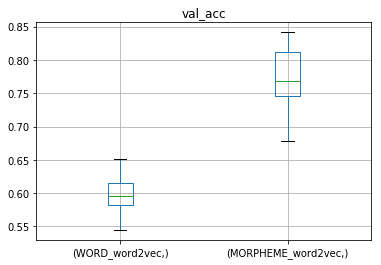

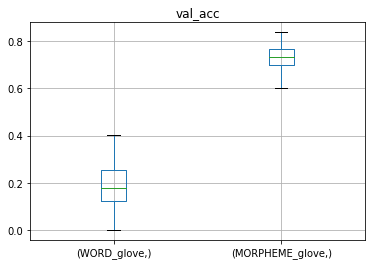

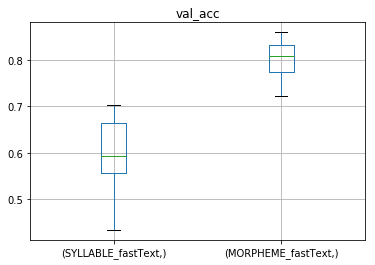

In [3]:
# word2vec 
compare_model(word2vec_word, word2vec_morpheme)
# glove
compare_model(glove_word, glove_morpheme)
# fastText
compare_model(fastText_word, fastText_morpheme)

## -> 모든 단위에서 확연히 형태소 단위의 입력이 단어 단위의 입력보다 우세하다

## Compare between models

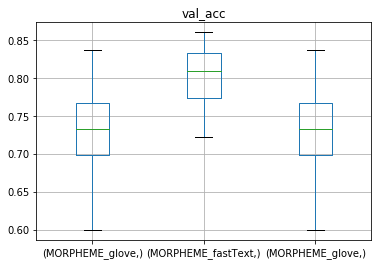

In [4]:
compare_model(glove_morpheme, fastText_morpheme, glove_morpheme)

## -> 형태소 단위의 입력에서는 fastText > w2vec(sgns) ~ glove

## Compare params

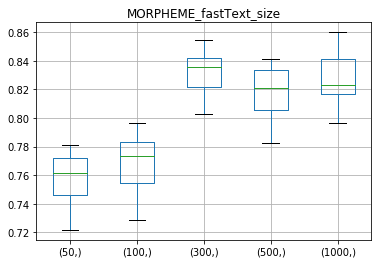

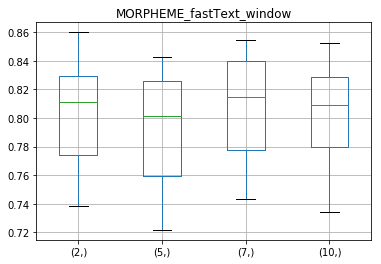

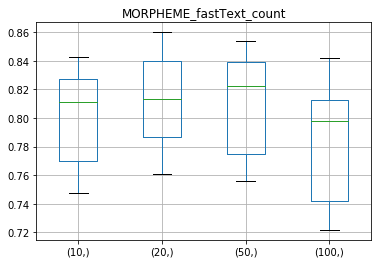

In [5]:
compare_param(fastText_morpheme, 'size')
compare_param(fastText_morpheme, 'window')
compare_param(fastText_morpheme, 'count')

## size파라메터가 모델의 정확도에 가장 영향을 많이주었다
## window 나 minimum count 파라메터의 조합에 따른 성능 비교는 아래에서 확인할 수 있다

## Window - Min_count Relation Plot (groupBy Window)

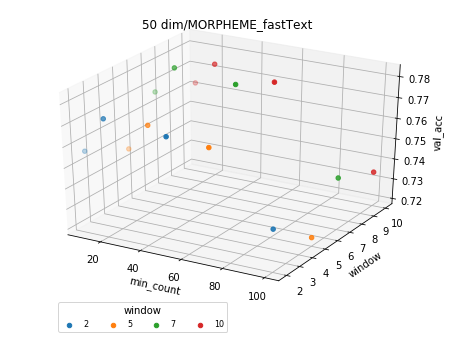

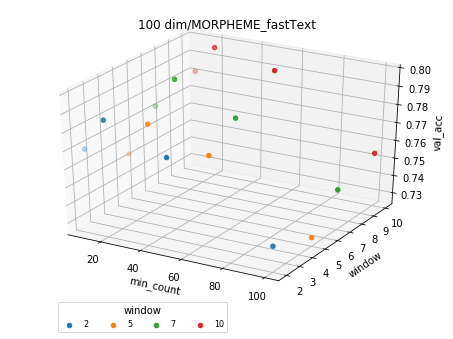

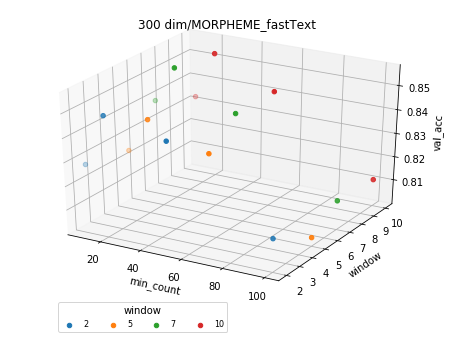

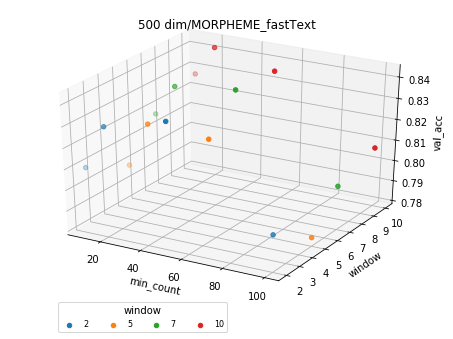

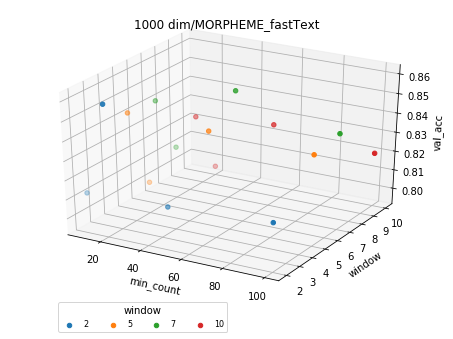

In [6]:
# group by window - line Fales
for size in size_list:
    scatter(fastText_morpheme, size, groupBy="window", line=False)

## size를 고정시키고 window-min_count의 조합에 따라 정확도를 표시하되 같은 window는 같은 색으로 표시했다
## 아래는 선으로 표시한 것이다.

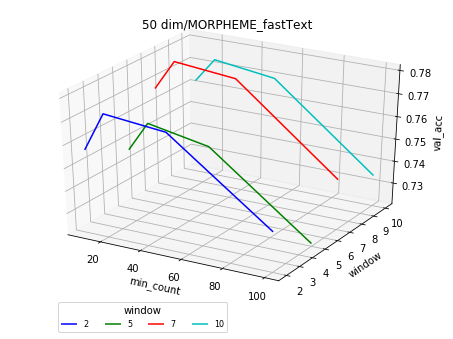

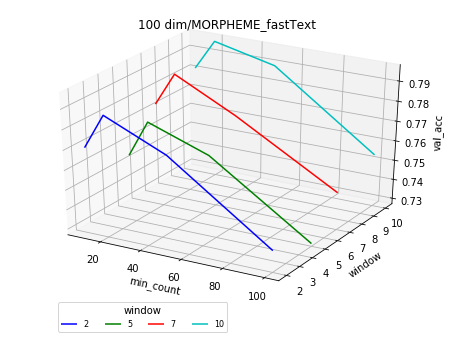

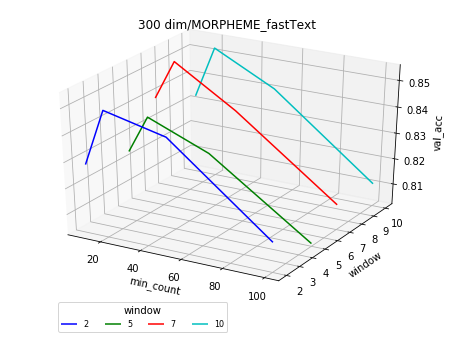

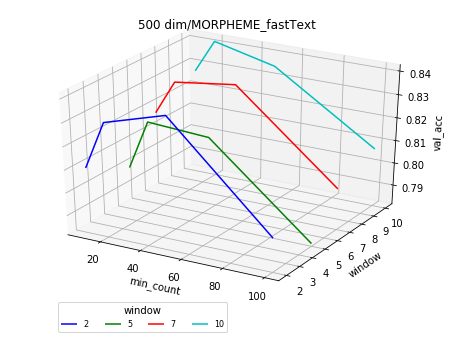

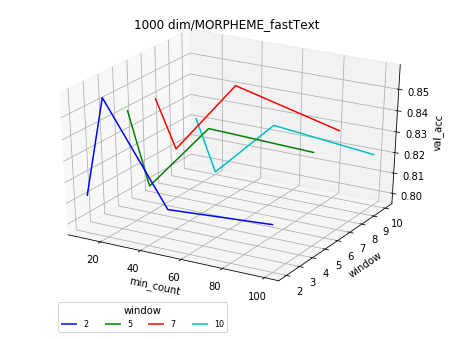

In [7]:
# group by window - line True
interpret = {}
for size in size_list:
    result = scatter(fastText_morpheme, size, groupBy="window", line=True)
    interpret[size] = result

In [8]:
for size in size_list:
    print("{0} : {1}".format(size, interpret[size]))

50 : [ 5 10  2  7]
100 : [ 5  2  7 10]
300 : [ 5  2 10  7]
500 : [ 5  7  2 10]
1000 : [10  5  7  2]


## Window - Min_count Relation Plot (groupBy Count)

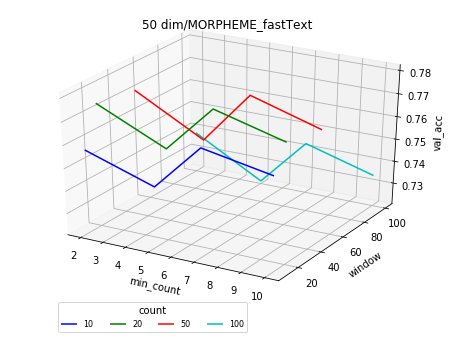

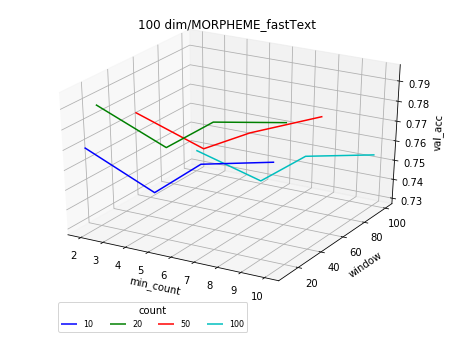

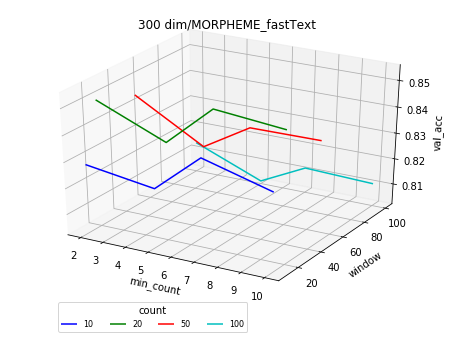

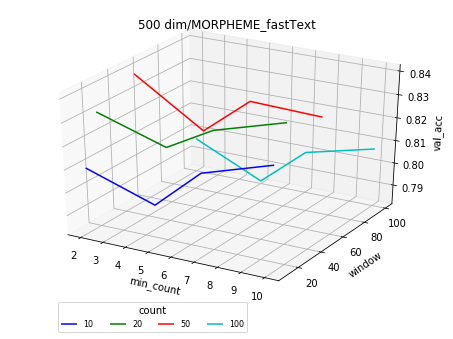

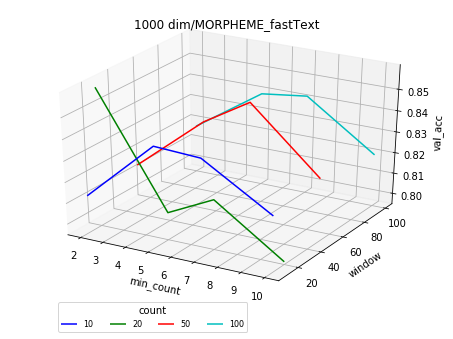

In [9]:
# group by count
interpret = {}
for size in size_list:
    result = scatter(fastText_morpheme, size, groupBy="count", line=True)
    interpret[size] = result

In [10]:
for size in size_list:
    print("{0} : {1}".format(size, interpret[size]))

50 : [100  10  50  20]
100 : [100  10  50  20]
300 : [100  10  50  20]
500 : [100  10  50  20]
1000 : [100  10  50  20]


## Surf Plot by size

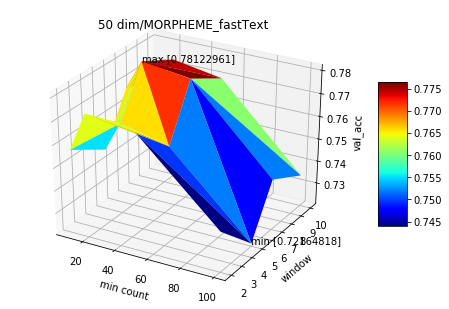

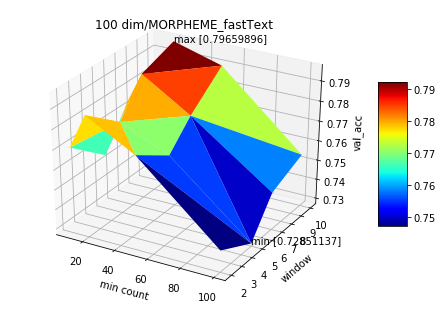

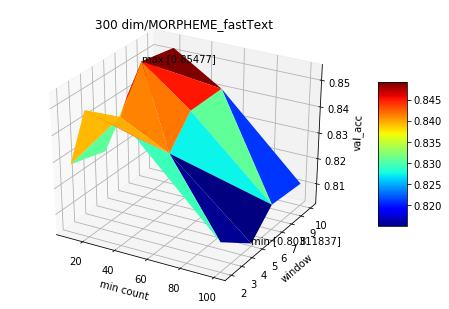

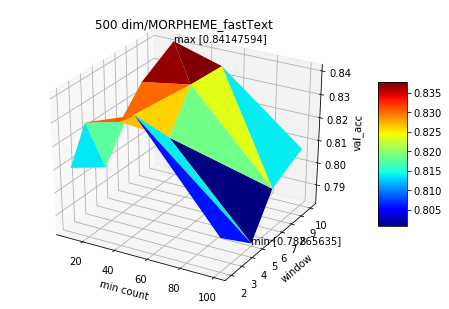

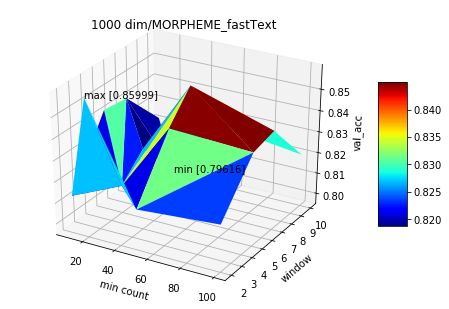

In [11]:
for size in size_list:
    plot_3d_surf(fastText_morpheme, size)

## SKipGram vs CBOW

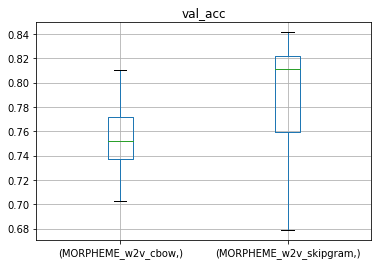

In [12]:
skipgram_word2vec = pd.read_csv("./result_csv/(sg_ns)word2vec_MORPHEME.csv", index_col=0)
skipgram_word2vec['model'] = skipgram_word2vec['model'].map({'word2vec': 'w2v_skipgram'})
cbow_word2vec = pd.read_csv("./result_csv/(cbow_ns)word2vec_MORPHEME.csv", index_col=0)
cbow_word2vec['model'] = cbow_word2vec['model'].map({'word2vec': 'w2v_cbow'})
compare_model(cbow_word2vec, skipgram_word2vec)

## CBOW 보다 SkipGram의 성능이 더 좋게 측정되었다

## FastText Unit Compare : JAMO vs SYLLABLE (WORD) / WIP

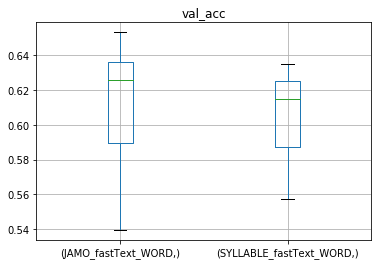

In [13]:
# note that this part is incomplete
fastText_word = pd.read_csv("./result_csv/(unit_compare)fastText.csv", index_col=0)
jamo = select_dataframe(fastText_word, "fastText_WORD", "JAMO")
syllable = select_dataframe(fastText_word, "fastText_WORD", "SYLLABLE")
compare_model(jamo, syllable)

## word 단위에서 자모로 분리한 입력이 음절단위 보다 더 좋은것으로 평가되었다

## TOP n Accuracy

In [14]:
fastText_morpheme.sort_values(by='val_acc', ascending=False).head(5)

,type,model,window,size,count,acc,loss,val_acc,val_loss
1,MORPHEME,fastText,2,1000,20,0.857537,0.455650,0.859990,0.831212
4,MORPHEME,fastText,7,300,20,0.928033,0.407341,0.854770,0.589227
5,MORPHEME,fastText,7,1000,50,0.875044,0.790955,0.853934,0.590042
6,MORPHEME,fastText,10,300,20,0.926173,0.417405,0.852230,0.562615
7,MORPHEME,fastText,2,300,20,0.930363,0.405508,0.850180,0.583748


In [15]:
word2vec_morpheme.sort_values(by='val_acc', ascending=False).head(5)

,type,model,window,size,count,acc,loss,val_acc,val_loss
12,MORPHEME,word2vec,10,500,20,0.931570,0.374700,0.841400,0.563303
17,MORPHEME,word2vec,10,500,10,0.831208,0.846291,0.839851,0.663142
22,MORPHEME,word2vec,10,500,50,0.824999,0.856095,0.837884,0.729713
25,MORPHEME,word2vec,5,1000,10,0.820471,0.830271,0.835784,0.660463
31,MORPHEME,word2vec,7,1000,10,0.962463,0.357063,0.831170,0.600407


In [16]:
glove_morpheme.sort_values(by='val_acc', ascending=False).head(5)

,type,model,window,size,count,acc,loss,val_acc,val_loss
23,MORPHEME,glove,7,1000,10,0.600841,1.046637,0.837040,0.774622
27,MORPHEME,glove,7,500,10,0.770527,0.805446,0.833323,0.770552
52,MORPHEME,glove,10,1000,10,0.656234,1.051976,0.822339,0.777445
68,MORPHEME,glove,10,500,10,0.709046,0.767489,0.818054,0.779282
90,MORPHEME,glove,5,1000,10,0.693206,0.746265,0.808366,0.767530


In [17]:
word2vec_word.sort_values(by='val_acc', ascending=False).head(5)

,type,model,window,size,count,acc,loss,val_acc,val_loss
333,WORD,word2vec,7,300,10,0.377015,0.900680,0.650707,0.385647
339,WORD,word2vec,10,300,10,0.380762,0.883067,0.636348,0.439269
341,WORD,word2vec,7,300,50,0.351410,0.879842,0.635897,0.375007
342,WORD,word2vec,7,300,20,0.617167,0.614238,0.632890,0.540539
343,WORD,word2vec,7,1000,10,0.358466,0.886352,0.632841,0.365796


## Tensorboard Visualization

In [ ]:
import tensorboard_visualizer

# example 
top_5_fastText = fastText_morpheme.sort_values(by='val_acc', ascending=False).head(5)
params = top_5_fastText.to_dict(orient='records')
file_name = tensorboard_visualizer.file_selector("./embeddings_only/", params[0])
print("selected file : ", file_name)
# file_name = "MORPHEME_fastText_nsmc_sample=0.001, workers=11, parser='twitter', iter=5, window=5, size=300, min_count=20"
tensorboard_visualizer.create_embedding_projector("./embeddings_only/", file_name)

C:\Users\leehk\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\leehk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


{'type': 'MORPHEME', 'model': 'fastText', 'parser': "'twitter'", 'workers': '11', 'sample': '0.001', 'count': '20', 'window': '2', 'iter': '5', 'size': '1000'}
selected file :  MORPHEME_fastText_nsmc_parser='twitter', workers=11, sample=0.001, min_count=20, window=2, iter=5, size=1000
path already exists


In [18]:
# example 
top_5_word2vec_morpheme = word2vec_morpheme.sort_values(by='val_acc', ascending=False).head(5)
params = top_5_word2vec_morpheme.to_dict(orient='records')
file_name = tensorboard_visualizer.file_selector("./embeddings_only/", params[0])
print("selected file : ", file_name)
# file_name = "MORPHEME_fastText_nsmc_sample=0.001, workers=11, parser='twitter', iter=5, window=5, size=300, min_count=20"
tensorboard_visualizer.create_embedding_projector("./embeddings_only/", file_name)

{'type': 'MORPHEME', 'model': 'fastText', 'parser': "'twitter'", 'workers': '11', 'sample': '0.001', 'count': '20', 'window': '2', 'iter': '5', 'size': '1000'}
{'type': 'MORPHEME', 'model': 'fastText', 'sample': '0.001', 'workers': '11', 'parser': "'twitter'", 'iter': '5', 'window': '5', 'size': '300', 'count': '20'}
{'type': 'MORPHEME', 'model': 'fastText', 'sample': '0.001', 'workers': '11', 'parser': "'twitter'", 'iter': '5', 'window': '7', 'size': '300', 'count': '20'}
{'type': 'MORPHEME', 'model': 'word2vec', 'count': '20', 'workers': '11', 'window': '5', 'iter': '5', 'sample': '0.001', 'parser': "'twitter'", 'size': '500'}
{'type': 'MORPHEME', 'model': 'word2vec', 'sample': '0.001', 'parser': "'twitter'", 'size': '500', 'iter': '5', 'workers': '11', 'count': '20', 'window': '10'}
selected file :  MORPHEME_word2vec_nsmc_sample=0.001, parser='twitter', size=500, iter=5, workers=11, min_count=20, window=10
path already exists
ERROR! Session/line number was not unique in database. Hi

# PCA vs TSNE
# PCA
<img src="./png/fastText/pca/K-002.jpg">
# TSNE
<img src="./png/fastText/tsne/K-001.jpg">

## 텐서보드의 Embedding Projector에 맵핑을 하였고, 
## 단어 임베딩을 보니 PCA 보다는 TSNE로 클러스터가 결과를 더 분명하게 확인할 수 있었다.

## TSNE : Perplexity = 25, iteration = 500

# Compare, clusters
## word2vec
<img src="./png/common_syllable/word2vec_1.jpg">
## fastText
<img src="./png/common_syllable/fastText_1.jpg">
## word2vec
<img src="./png/common_syllable/word2vec_2.jpg">
## fastText
<img src="./png/common_syllable/fastText_2.jpg">

## FastText의 경우
<img src="./png/fastText_equation.png">

fastText 모델에 따르면 target word와 gram을 공유하는 단어의 벡터도 변하기때문에  
원래의 윈도우에 포함되어 있지 않은 단어일지라도 학습가능하다.